In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

read in data

In [2]:
#function to create dataframe list
def Dataframe_Maker(path):
    df_list = []
    for file in os.listdir(path):
        df = pd.read_csv(path + "\\" + file)
        df_list.append(df)
        
    return df_list    

In [3]:
CVD_path = "C:\\Users\\marcj\\OneDrive\\dsir-907\\Proj4Team2\\data\\IHME_USA_COUNTY_CVD_MORTALITY_RATES_1980_2014"
INF_path = "C:\\Users\\marcj\\OneDrive\\dsir-907\\Proj4Team2\\data\\IHME_USA_COUNTY_INFECT_DIS_MORT_1980_2014"
RESP_path = "C:\\Users\\marcj\\OneDrive\\dsir-907\\Proj4Team2\\data\\IHME_USA_COUNTY_RESP_DISEASE_MORTALITY_1980_2014"

In [4]:
CVD_list = Dataframe_Maker(CVD_path)
INF_list = Dataframe_Maker(INF_path)
RESP_list = Dataframe_Maker(RESP_path)

In [5]:
df_OBES = pd.read_csv('./data/IHME_USA_OBESITY_PHYSICAL_ACTIVITY_2001_2011.csv')

In [6]:
CVD_list[0]

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,upper,lower
0,1,Deaths,523,Alabama,1,491,Cardiovascular diseases,1,Male,27,Age-standardized,1980,Rate,674.498324,686.452650,662.530544
1,1,Deaths,523,Alabama,1,491,Cardiovascular diseases,1,Male,27,Age-standardized,1981,Rate,664.267500,675.148290,653.716080
2,1,Deaths,523,Alabama,1,491,Cardiovascular diseases,1,Male,27,Age-standardized,1982,Rate,640.969676,651.259897,630.132584
3,1,Deaths,523,Alabama,1,491,Cardiovascular diseases,1,Male,27,Age-standardized,1983,Rate,636.345490,647.085911,625.485014
4,1,Deaths,523,Alabama,1,491,Cardiovascular diseases,1,Male,27,Age-standardized,1984,Rate,630.471981,640.885352,619.639534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92815,1,Deaths,587,Winston County,1133,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2010,Rate,12.766872,14.732510,10.853729
92816,1,Deaths,587,Winston County,1133,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2011,Rate,12.745844,14.692608,10.854364
92817,1,Deaths,587,Winston County,1133,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2012,Rate,12.620324,14.625477,10.823916
92818,1,Deaths,587,Winston County,1133,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2013,Rate,12.606166,14.672703,10.595000


In [7]:
CVD_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92820 entries, 0 to 92819
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     92820 non-null  int64  
 1   measure_name   92820 non-null  object 
 2   location_id    92820 non-null  int64  
 3   location_name  92820 non-null  object 
 4   FIPS           92820 non-null  int64  
 5   cause_id       92820 non-null  int64  
 6   cause_name     92820 non-null  object 
 7   sex_id         92820 non-null  int64  
 8   sex            92820 non-null  object 
 9   age_id         92820 non-null  int64  
 10  age_name       92820 non-null  object 
 11  year_id        92820 non-null  int64  
 12  metric         92820 non-null  object 
 13  mx             92820 non-null  float64
 14  upper          92820 non-null  float64
 15  lower          92820 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 11.3+ MB


In [8]:
CVD_list[0]['cause_name'].unique()

array(['Cardiovascular diseases', 'Rheumatic heart disease',
       'Ischemic heart disease', 'Cerebrovascular disease',
       'Ischemic stroke', 'Hemorrhagic stroke',
       'Hypertensive heart disease', 'Cardiomyopathy and myocarditis',
       'Atrial fibrillation and flutter', 'Aortic aneurysm',
       'Peripheral vascular disease', 'Endocarditis',
       'Other cardiovascular and circulatory diseases'], dtype=object)

- Add state to each df.

In [17]:
state_dict = {0 : 'ALABAMA',
1 : 'ALASKA',
2 : 'ARIZONA',
3 : 'ARKANSAS',
4 : 'CALIFORNIA',
5 : 'COLORADO',
6 : 'CONNECTICUT',
7 : 'DELAWARE',
8 : 'DISTRICT_OF_COLUMBIA',
9 : 'FLORIDA',
10 : 'GEORGIA',
11 : 'HAWAII',
12 : 'IDAHO',
13 : 'ILLINOIS',
14 : 'INDIANA',
15 : 'IOWA',
16 : 'KANSAS',
17 : 'KENTUCKY',
18 : 'LOUISIANA',
19 : 'MAINE',
20 : 'MARYLAND',
21 : 'MASSACHUSETTS',
22 : 'MICHIGAN',
23 : 'MINNESOTA',
24 : 'MISSISSIPPI',
25 : 'MISSOURI',
26 : 'MONTANA',
27 : 'NEBRASKA',
28 : 'NEVADA',
29 : 'NEW_HAMPSHIRE',
30 : 'NEW_JERSEY',
31 : 'NEW_MEXICO',
32 : 'NEW_YORK',
33 : 'NORTH_CAROLINA',
34 : 'NORTH_DAKOTA',
35 : 'OHIO',
36 : 'OKLAHOMA',
37 : 'OREGON',
38 : 'PENNSYLVANIA',
39 : 'RHODE_ISLAND',
40 : 'SOUTH_CAROLINA',
41 : 'SOUTH_DAKOTA',
42 : 'TENNESSEE',
43 : 'TEXAS',
44 : 'UNITED_STATES',
45 : 'UTAH',
46 : 'VERMONT',
47 : 'VIRGINIA',
48 : 'WASHINGTON',
49 : 'WEST_VIRGINIA',
50 : 'WISCONSIN',
51 : 'WYOMING'    
}

In [18]:
stat_lists = [CVD_list, INF_list, RESP_list]

In [19]:
for stat_list in stat_lists:
    for i in range(52):
        stat_list[i]['State'] = [state_dict[i] for x in range(len(stat_list[i]))]

In [20]:
INF_list[10].head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper,State
0,1,Deaths,533,Georgia,13,297,Tuberculosis,1,Male,27,Age-standardized,1980,Rate,2.691055,2.412192,3.005309,GEORGIA
1,1,Deaths,533,Georgia,13,297,Tuberculosis,1,Male,27,Age-standardized,1981,Rate,2.682878,2.439596,2.942372,GEORGIA
2,1,Deaths,533,Georgia,13,297,Tuberculosis,1,Male,27,Age-standardized,1982,Rate,2.572012,2.339195,2.819993,GEORGIA
3,1,Deaths,533,Georgia,13,297,Tuberculosis,1,Male,27,Age-standardized,1983,Rate,2.454791,2.257839,2.673229,GEORGIA
4,1,Deaths,533,Georgia,13,297,Tuberculosis,1,Male,27,Age-standardized,1984,Rate,2.310964,2.127409,2.509959,GEORGIA


- combine.

In [21]:
df_CVD = pd.concat([df for df in CVD_list])

In [22]:
df_INF = pd.concat([df for df in INF_list])

In [23]:
df_RESP = pd.concat([df for df in RESP_list])

In [24]:
df_CVD

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,upper,lower,State
0,1,Deaths,523,Alabama,1.0,491,Cardiovascular diseases,1,Male,27,Age-standardized,1980,Rate,674.498324,686.452650,662.530544,ALABAMA
1,1,Deaths,523,Alabama,1.0,491,Cardiovascular diseases,1,Male,27,Age-standardized,1981,Rate,664.267500,675.148290,653.716080,ALABAMA
2,1,Deaths,523,Alabama,1.0,491,Cardiovascular diseases,1,Male,27,Age-standardized,1982,Rate,640.969676,651.259897,630.132584,ALABAMA
3,1,Deaths,523,Alabama,1.0,491,Cardiovascular diseases,1,Male,27,Age-standardized,1983,Rate,636.345490,647.085911,625.485014,ALABAMA
4,1,Deaths,523,Alabama,1.0,491,Cardiovascular diseases,1,Male,27,Age-standardized,1984,Rate,630.471981,640.885352,619.639534,ALABAMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32755,1,Deaths,3699,Weston County,56045.0,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2010,Rate,12.805884,14.370669,11.331518,WYOMING
32756,1,Deaths,3699,Weston County,56045.0,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2011,Rate,12.979649,14.647476,11.461381,WYOMING
32757,1,Deaths,3699,Weston County,56045.0,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2012,Rate,13.116169,14.820944,11.535357,WYOMING
32758,1,Deaths,3699,Weston County,56045.0,507,Other cardiovascular and circulatory diseases,3,Both,27,Age-standardized,2013,Rate,13.295739,15.012875,11.668381,WYOMING


- drop unneccesary columns.

In [25]:
bad_columns = ['metric', 'age_name', 'sex_id', 'measure_name', 'location_id']

In [26]:
df_CVD.drop(columns=bad_columns, inplace=True)
df_INF.drop(columns=bad_columns, inplace=True)
df_RESP.drop(columns=bad_columns, inplace=True)

In [27]:
df_RESP

,measure_id,location_name,FIPS,cause_id,cause_name,sex,age_id,year_id,mx,lower,upper,State
0,1,Alabama,1.0,508,Chronic respiratory diseases,Male,27,1980,78.824014,76.041654,81.286033,ALABAMA
1,1,Alabama,1.0,508,Chronic respiratory diseases,Male,27,1981,79.044366,76.508765,81.527669,ALABAMA
2,1,Alabama,1.0,508,Chronic respiratory diseases,Male,27,1982,78.811259,76.276765,81.191471,ALABAMA
3,1,Alabama,1.0,508,Chronic respiratory diseases,Male,27,1983,79.076657,76.682248,81.373666,ALABAMA
4,1,Alabama,1.0,508,Chronic respiratory diseases,Male,27,1984,80.532524,78.120355,82.876109,ALABAMA
...,...,...,...,...,...,...,...,...,...,...,...,...
25195,1,Weston County,56045.0,520,Other chronic respiratory diseases,Both,27,2010,0.903417,0.727414,1.107723,WYOMING
25196,1,Weston County,56045.0,520,Other chronic respiratory diseases,Both,27,2011,0.908048,0.734096,1.131677,WYOMING
25197,1,Weston County,56045.0,520,Other chronic respiratory diseases,Both,27,2012,0.914974,0.734246,1.131977,WYOMING
25198,1,Weston County,56045.0,520,Other chronic respiratory diseases,Both,27,2013,0.901709,0.721467,1.128415,WYOMING


- drop vague causes and locations.

In [53]:
states_lower = []
for state in list(state_dict.values()):
    states_lower.append(state[0] + state[1:].lower())

In [58]:
states_lower[:5]

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California']

In [59]:
df_CVD = df_CVD[~df_CVD['location_name'].isin(list(states_lower))]
df_INF = df_INF[~df_INF['location_name'].isin(list(states_lower))]
df_RESP = df_RESP[~df_RESP['location_name'].isin(list(states_lower))]

In [60]:
df_CVD['cause_name'].unique()

array(['Cardiovascular diseases', 'Rheumatic heart disease',
       'Ischemic heart disease', 'Cerebrovascular disease',
       'Ischemic stroke', 'Hemorrhagic stroke',
       'Hypertensive heart disease', 'Cardiomyopathy and myocarditis',
       'Atrial fibrillation and flutter', 'Aortic aneurysm',
       'Peripheral vascular disease', 'Endocarditis',
       'Other cardiovascular and circulatory diseases'], dtype=object)

In [128]:
df_INF['cause_name'].unique()

array(['Tuberculosis', 'HIV/AIDS', 'Diarrheal diseases',
       'Lower respiratory infections', 'Meningitis', 'Hepatitis'],
      dtype=object)

In [129]:
df_RESP['cause_name'].unique()

array(['Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'], dtype=object)

In [130]:
bad_causes = ['Cardiovascular diseases',
              'Other cardiovascular and circulatory diseases', 
              'Other pneumoconiosis', 
              'Other chronic respiratory diseases',
              'Chronic respiratory diseases']

In [131]:
df_CVD = df_CVD[~df_CVD['cause_name'].isin(list(bad_causes))]
df_INF = df_INF[~df_INF['cause_name'].isin(list(bad_causes))]
df_RESP = df_RESP[~df_RESP['cause_name'].isin(list(bad_causes))]

In [132]:
df_OBES.head()

,fips,merged_fips,State,County,Sex,Outcome,Prevalence 2001 (%),Prevalence 2001 lower bound (%),Prevalence 2001 upper bound (%),Prevalence 2002 (%),...,Prevalence 2009 upper bound (%),Prevalence 2010 (%),Prevalence 2010 lower bound (%),Prevalence 2010 upper bound (%),Prevalence 2011 (%),Prevalence 2011 lower bound (%),Prevalence 2011 upper bound (%),Difference 2001 to 2009,Difference 2001 to 2009 lower bound,Difference 2001 to 2009 upper bound
0,1001.0,1001,Alabama,"Autauga, AL",Male,Any PA,76.72,71.45,80.94,77.30,...,80.81,76.37,71.06,80.87,76.05,70.21,81.02,0.01,-6.70,6.75
1,1001.0,1001,Alabama,"Autauga, AL",Female,Any PA,68.21,62.94,73.12,68.79,...,72.86,68.74,64.19,72.93,68.75,63.69,73.12,0.55,-6.32,6.91
2,1003.0,1003,Alabama,"Baldwin, AL",Male,Any PA,73.90,69.75,78.34,74.41,...,81.16,78.04,74.96,81.10,77.69,74.17,81.13,4.43,-0.88,9.39
3,1003.0,1003,Alabama,"Baldwin, AL",Female,Any PA,71.84,67.69,75.63,72.66,...,75.43,72.69,69.93,75.29,72.56,69.43,75.45,1.03,-3.59,6.10
4,1005.0,1005,Alabama,"Barbour, AL",Male,Any PA,65.61,59.40,71.07,66.21,...,71.81,66.23,60.61,71.73,65.75,59.24,72.07,1.05,-6.94,9.60


Graph Ideas <br>
Obesity prevalance by county in texas in 2001

In [133]:
df_OBES[df_OBES['State']=='Texas']

,fips,merged_fips,State,County,Sex,Outcome,Prevalence 2001 (%),Prevalence 2001 lower bound (%),Prevalence 2001 upper bound (%),Prevalence 2002 (%),...,Prevalence 2009 upper bound (%),Prevalence 2010 (%),Prevalence 2010 lower bound (%),Prevalence 2010 upper bound (%),Prevalence 2011 (%),Prevalence 2011 lower bound (%),Prevalence 2011 upper bound (%),Difference 2001 to 2009,Difference 2001 to 2009 lower bound,Difference 2001 to 2009 upper bound
5044,48001.0,48001,Texas,"Anderson, TX",Male,Any PA,69.41,63.57,74.61,70.01,...,77.75,72.36,66.35,77.56,71.74,64.69,77.59,3.56,-4.47,11.23
5045,48001.0,48001,Texas,"Anderson, TX",Female,Any PA,60.93,54.45,66.60,61.80,...,71.03,66.71,61.89,71.48,66.75,61.60,71.96,5.61,-1.76,13.83
5046,48003.0,48003,Texas,"Andrews, TX",Male,Any PA,71.14,65.02,76.80,72.13,...,76.56,70.44,63.87,76.29,70.39,63.10,76.68,-0.18,-8.60,7.87
5047,48003.0,48003,Texas,"Andrews, TX",Female,Any PA,64.25,58.05,70.21,65.13,...,71.40,65.40,59.02,71.35,65.78,59.27,71.76,1.04,-7.67,9.39
5048,48005.0,48005,Texas,"Angelina, TX",Male,Any PA,70.61,65.38,75.92,71.37,...,77.38,71.97,66.21,77.46,71.71,65.38,77.87,1.65,-6.49,9.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18119,48503.0,48503,Texas,"Young, TX",Female,Sufficient PA,41.91,34.06,48.80,NaN,...,54.61,NaN,NaN,NaN,49.04,41.68,57.01,5.70,-4.01,16.29
18120,48505.0,48505,Texas,"Zapata, TX",Male,Sufficient PA,41.91,34.56,50.07,NaN,...,53.56,NaN,NaN,NaN,43.68,32.86,54.24,3.94,-7.38,14.49
18121,48505.0,48505,Texas,"Zapata, TX",Female,Sufficient PA,32.98,26.23,40.13,NaN,...,46.44,NaN,NaN,NaN,40.07,32.75,48.24,6.32,-3.51,15.83
18122,48507.0,48507,Texas,"Zavala, TX",Male,Sufficient PA,40.10,32.06,48.40,NaN,...,55.37,NaN,NaN,NaN,45.34,35.39,55.85,7.43,-3.64,18.98


In [134]:
df_OBES[(df_OBES['State']=='Texas') & (df_OBES['Outcome']=='Sufficient PA')]

,fips,merged_fips,State,County,Sex,Outcome,Prevalence 2001 (%),Prevalence 2001 lower bound (%),Prevalence 2001 upper bound (%),Prevalence 2002 (%),...,Prevalence 2009 upper bound (%),Prevalence 2010 (%),Prevalence 2010 lower bound (%),Prevalence 2010 upper bound (%),Prevalence 2011 (%),Prevalence 2011 lower bound (%),Prevalence 2011 upper bound (%),Difference 2001 to 2009,Difference 2001 to 2009 lower bound,Difference 2001 to 2009 upper bound
17616,48001.0,48001,Texas,"Anderson, TX",Male,Sufficient PA,48.36,40.85,56.02,NaN,...,59.59,NaN,NaN,NaN,52.13,42.49,62.10,4.85,-5.10,14.65
17617,48001.0,48001,Texas,"Anderson, TX",Female,Sufficient PA,34.01,27.81,40.83,NaN,...,50.87,NaN,NaN,NaN,46.87,40.46,53.35,11.35,2.12,19.74
17618,48003.0,48003,Texas,"Andrews, TX",Male,Sufficient PA,50.71,42.92,58.83,NaN,...,58.52,NaN,NaN,NaN,50.45,40.81,59.80,1.06,-9.71,11.34
17619,48003.0,48003,Texas,"Andrews, TX",Female,Sufficient PA,38.74,31.75,45.71,NaN,...,50.13,NaN,NaN,NaN,44.71,37.40,52.95,4.44,-4.94,14.39
17620,48005.0,48005,Texas,"Angelina, TX",Male,Sufficient PA,53.22,46.10,60.85,NaN,...,58.47,NaN,NaN,NaN,50.95,41.51,59.97,-1.28,-11.05,8.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18119,48503.0,48503,Texas,"Young, TX",Female,Sufficient PA,41.91,34.06,48.80,NaN,...,54.61,NaN,NaN,NaN,49.04,41.68,57.01,5.70,-4.01,16.29
18120,48505.0,48505,Texas,"Zapata, TX",Male,Sufficient PA,41.91,34.56,50.07,NaN,...,53.56,NaN,NaN,NaN,43.68,32.86,54.24,3.94,-7.38,14.49
18121,48505.0,48505,Texas,"Zapata, TX",Female,Sufficient PA,32.98,26.23,40.13,NaN,...,46.44,NaN,NaN,NaN,40.07,32.75,48.24,6.32,-3.51,15.83
18122,48507.0,48507,Texas,"Zavala, TX",Male,Sufficient PA,40.10,32.06,48.40,NaN,...,55.37,NaN,NaN,NaN,45.34,35.39,55.85,7.43,-3.64,18.98


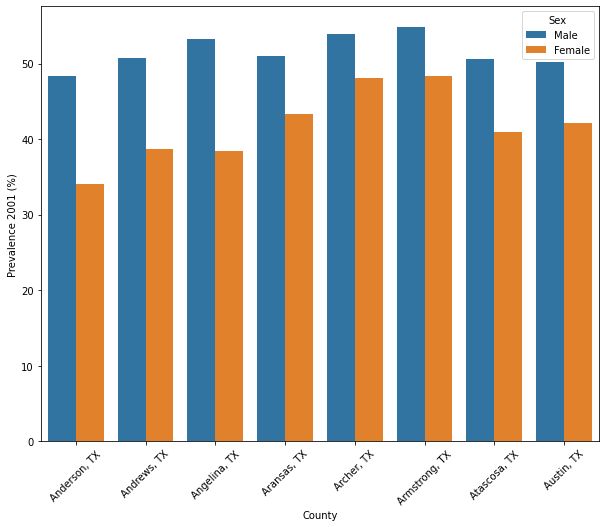

In [135]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_OBES[(df_OBES['State']=='Texas') & (df_OBES['Outcome']=='Sufficient PA')][:16], x='County', y='Prevalence 2001 (%)', hue='Sex', orient='v')
plt.xticks(rotation=45);

In [136]:
df_OBES.dropna().iloc[0][6:-5:3]

Prevalence 2001 (%)    76.72
Prevalence 2002 (%)     77.3
Prevalence 2003 (%)    77.63
Prevalence 2004 (%)    77.03
Prevalence 2005 (%)    77.21
Prevalence 2006 (%)    76.72
Prevalence 2007 (%)    77.32
Prevalence 2008 (%)    77.32
Prevalence 2009 (%)    76.73
Prevalence 2010 (%)    76.37
Prevalence 2011 (%)    76.05
Name: 0, dtype: object

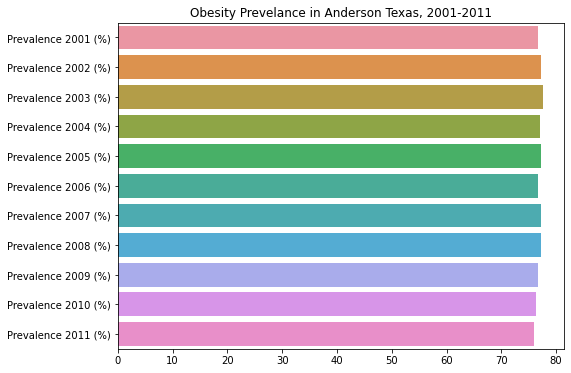

In [137]:
plt.figure(figsize=(8,6))
sns.barplot(y=df_OBES.dropna().iloc[0][6:-5:3].index, x=df_OBES.dropna().iloc[0][6:-5:3].values);
plt.title("Obesity Prevelance in Anderson Texas, 2001-2011");

asthma in texas from 1980 to 2011

In [138]:
df_RESP.head()

,measure_id,location_name,FIPS,cause_id,cause_name,sex,age_id,year_id,mx,lower,upper,State
7245,1,Autauga County,1001.0,509,Chronic obstructive pulmonary disease,Male,27,1980,84.608427,75.408487,94.230922,ALABAMA
7246,1,Autauga County,1001.0,509,Chronic obstructive pulmonary disease,Male,27,1981,85.226568,76.322414,95.312518,ALABAMA
7247,1,Autauga County,1001.0,509,Chronic obstructive pulmonary disease,Male,27,1982,83.960607,75.219076,93.100727,ALABAMA
7248,1,Autauga County,1001.0,509,Chronic obstructive pulmonary disease,Male,27,1983,85.909162,77.446985,95.082537,ALABAMA
7249,1,Autauga County,1001.0,509,Chronic obstructive pulmonary disease,Male,27,1984,86.992649,78.126920,96.391295,ALABAMA


In [149]:
df_RESP[(df_RESP['cause_name']=='Asthma') & (df_RESP['location_name']=='Alameda County')][10:21]

,measure_id,location_name,FIPS,cause_id,cause_name,sex,age_id,year_id,mx,lower,upper,State
43480,1,Alameda County,6001.0,515,Asthma,Male,27,1990,2.671616,2.235103,3.188392,CALIFORNIA
43481,1,Alameda County,6001.0,515,Asthma,Male,27,1991,2.814470,2.341792,3.410788,CALIFORNIA
43482,1,Alameda County,6001.0,515,Asthma,Male,27,1992,2.496581,2.076202,2.989765,CALIFORNIA
43483,1,Alameda County,6001.0,515,Asthma,Male,27,1993,2.499778,2.064431,2.974636,CALIFORNIA
43484,1,Alameda County,6001.0,515,Asthma,Male,27,1994,2.599636,2.147547,3.091016,CALIFORNIA
43485,1,Alameda County,6001.0,515,Asthma,Male,27,1995,2.413302,1.985414,2.882332,CALIFORNIA
43486,1,Alameda County,6001.0,515,Asthma,Male,27,1996,2.315284,1.917370,2.788544,CALIFORNIA
43487,1,Alameda County,6001.0,515,Asthma,Male,27,1997,2.208015,1.850680,2.598433,CALIFORNIA
43488,1,Alameda County,6001.0,515,Asthma,Male,27,1998,2.014062,1.676497,2.428348,CALIFORNIA
43489,1,Alameda County,6001.0,515,Asthma,Male,27,1999,2.049729,1.708345,2.407526,CALIFORNIA


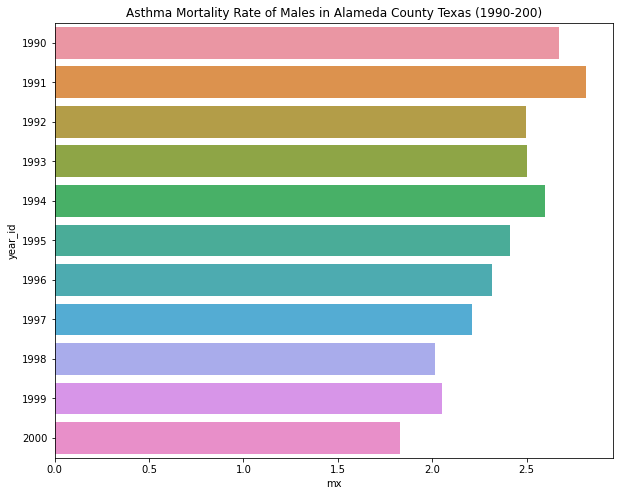

In [159]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_RESP[(df_RESP['cause_name']=='Asthma') & (df_RESP['location_name']=='Alameda County')][10:21], x='mx', y='year_id', orient='h')
plt.title("Asthma Mortality Rate of Males in Alameda County Texas (1990-200)");

In [154]:
df_INF.head(2)

,measure_id,location_name,FIPS,cause_id,cause_name,sex,age_id,year_id,mx,lower,upper,State
105,1,Autauga County,1001.0,297,Tuberculosis,Male,27,1980,1.603355,1.019430,2.415666,ALABAMA
106,1,Autauga County,1001.0,297,Tuberculosis,Male,27,1981,1.587168,1.015724,2.358733,ALABAMA


In [155]:
df_INF['cause_name'].unique()

array(['Tuberculosis', 'HIV/AIDS', 'Diarrheal diseases',
       'Lower respiratory infections', 'Meningitis', 'Hepatitis'],
      dtype=object)

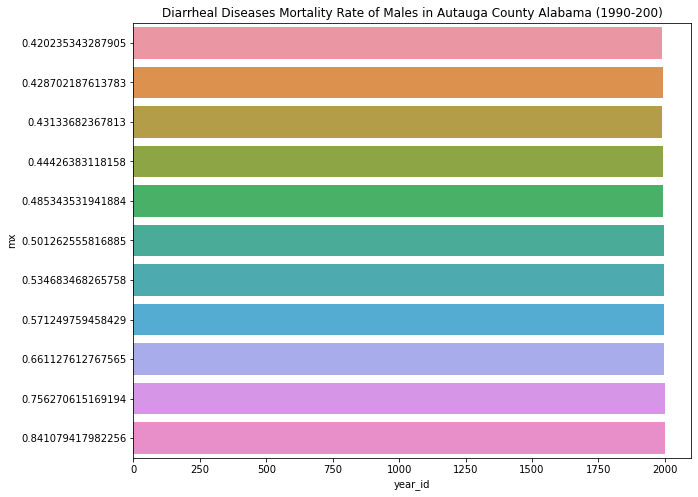

In [163]:
plt.figure(figsize=(10,8))
sns.barplot(data=df_INF[(df_INF['cause_name']=='Diarrheal diseases') & (df_INF['location_name']=='Autauga County')][10:21], x='year_id', y='mx', orient='h')
plt.title("Diarrheal Diseases Mortality Rate of Males in Autauga County Alabama (1990-200)");

In [165]:
df_INF.to_csv('./data/Infection_Disease_Mortality_Rate_Cleaned.csv')
df_RESP.to_csv('./data/Respiratory_Disease_Mortality_Rate_Cleaned.csv')